# Clasificación o reconocimiento de imágenes

In [1]:
from sklearn.datasets import fetch_openml 

In [2]:
mnist = fetch_openml(name = 'mnist_784', version = 1, as_frame = False)

In [3]:
X, y = mnist['data'], mnist['target'] 

In [4]:
X.shape 

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
print(X[0].reshape(28,28)) 

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

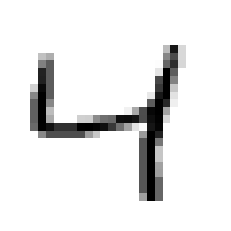

In [8]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 

instancia = X[2]
imagen = instancia.reshape(28, 28)
plt.imshow(imagen, cmap = 'binary')

plt.axis('off')
plt.savefig('cinco.png')
plt.show() 


In [9]:
y[2]

'4'

# Graficar las 100 primeras imágenes del dataset que tenemos

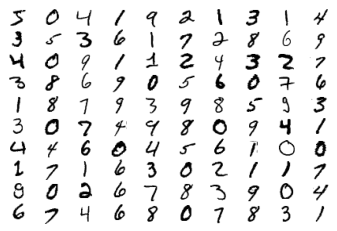

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt




for indice, instancia in enumerate(X[:100]):
    plt.subplot(10,10, indice+1)
    plt.imshow(instancia.reshape(28,28), cmap = 'binary')
    plt.axis('off')

plt.subplots_adjust(wspace = 0, hspace = 0)

plt.savefig('primeras_100.png') 

plt.show() 

In [11]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [12]:
import numpy as np 
y = y.astype(np.int8)

In [13]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [14]:
type(y[1])

numpy.int8

# Dividir nuestro conjunto de datos en un conjunto de entrenamiento y un conjunto de testeo 

In [15]:
X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]

In [16]:
len(X), len(X_train), len(X_test)

(70000, 60000, 10000)

In [17]:
len(y), len(y_train), len(y_test)

(70000, 60000, 10000)

In [18]:
type(y[0])

numpy.int8

# Constitución de las etiquetas para clasificación binaria

## Construir un detector de cincos

In [19]:
y_train_5 = (y_train == 5)
y_test_5 = y_test==5

In [20]:
from sklearn.linear_model import SGDClassifier 

In [21]:
sgd_clf = SGDClassifier(random_state = 42) 


In [22]:
sgd_clf.fit(X_train, y_train_5) 

SGDClassifier(random_state=42)

# Hagamos predicciones 

In [23]:
sgd_clf.predict([X[1]]) 

array([False])

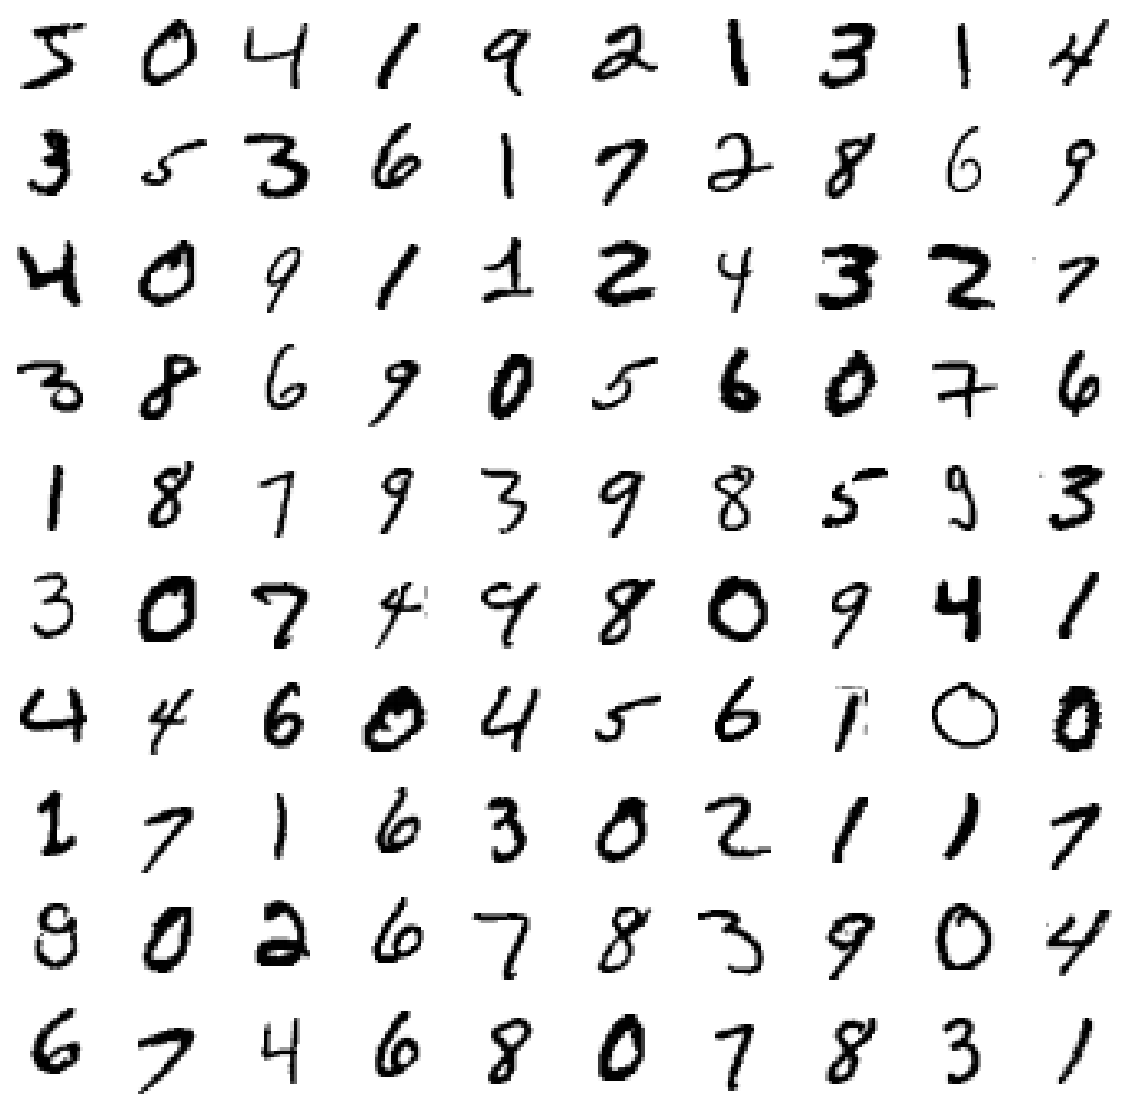

In [24]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(10,10, figsize = (20,20))

n_imagen = 0
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(X[n_imagen].reshape(28,28), cmap = 'binary')
        ax[i,j].axis('off') 
        n_imagen+=1

# Medición del desempeño mediante validación cruzada

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
%%time 
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

CPU times: total: 38.1 s
Wall time: 37.3 s


In [27]:
scores.std()  

0.004725874404688398

# Matriz de confusión para establecer el poder de generalización desde el dataset de entrenamiento

In [28]:
from sklearn.model_selection import cross_val_predict

In [29]:
%%time 
y_train_5_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 4)

CPU times: total: 1min 5s
Wall time: 1min 3s


In [30]:
from sklearn.metrics import confusion_matrix 

In [31]:
confusion_matrix(y_train_5, y_train_5_predict)

array([[53263,  1316],
       [ 1041,  4380]], dtype=int64)

## Conclusiones del uso de la matriz de confisión

* la matriz de confusión es una métrica que aglutina las métricas de exactitud, precision y recall.  

## Otras medidas de desempeño más formales

In [32]:
from sklearn.metrics import precision_score, recall_score

In [33]:
precision_score(y_train_5,  y_train_5_predict)

0.7689606741573034

In [34]:
recall_score(y_train_5,  y_train_5_predict)

0.8079690094078583

In [35]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\Marco\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


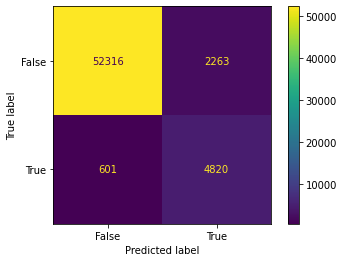

In [36]:
plot_confusion_matrix(sgd_clf, X_train, y_train_5)



# Calcular la precision y el recall de un clasificador binario

In [37]:
from sklearn.metrics import precision_score, recall_score 

In [38]:
precision_score(y_train_5, y_train_5_predict) 

0.7689606741573034

In [39]:
recall_score(y_train_5, y_train_5_predict) 

0.8079690094078583

In [41]:
y_test_5_predict = sgd_clf.predict(X_test)
precision_score(y_test_5, y_test_5_predict) 

0.6618887015177066

In [42]:
recall_score(y_test_5, y_test_5_predict) 

0.8800448430493274

# Prácticar la determinación de los puntajes de decisión que el SGDClassifier asigna a cada imágen 

In [ ]:
plt.imshow(X_test[0].reshape(28,28))
y_test[0]

In [ ]:
puntaje = sgd_clf.decision_function([X_test[0]]) 
puntaje 

In [ ]:
threshold = -9000
booleano = puntaje > threshold 
booleano 

In [45]:
from sklearn.metrics import precision_recall_curve 

In [46]:
y_scores = sgd_clf.decision_function(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [47]:
type(precisions)

numpy.ndarray

In [48]:
len(recalls), len(thresholds)

(59926, 59925)

In [49]:
thresholds.ndim, recalls.ndim

(1, 1)

In [51]:
len(thresholds), len(recalls[:-1]) 

(59925, 59925)

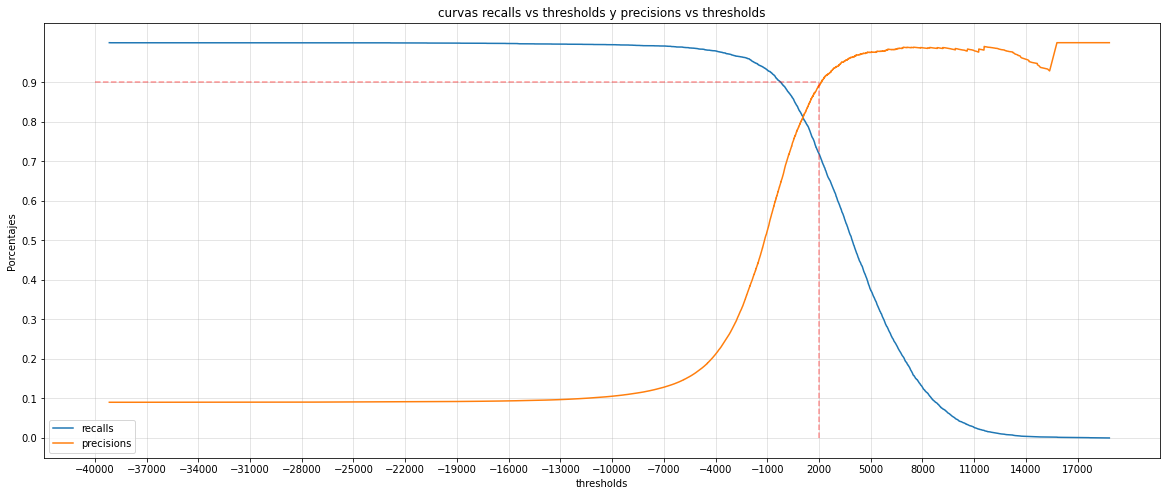

In [76]:
plt.figure(figsize = (20, 8))
plt.plot(thresholds, recalls[:-1], label = 'recalls')
plt.plot(thresholds, precisions[:-1], label = 'precisions')
plt.title('curvas recalls vs thresholds y precisions vs thresholds' )
plt.xlabel('thresholds')
plt.grid(alpha = 0.4)
plt.savefig('recall_vs_thresholds.jpg') 
plt.legend() 
plt.ylabel('Porcentajes') 
plt.xticks(np.arange(-40_000, 20_000, 3_000))
plt.yticks(np.arange(0, 1.0, 0.1))
plt.plot([-40_000, 2_000], [0.9, 0.9], 'r--', alpha = 0.4)
plt.plot([2000, 2000], [0.0, 0.9], 'r--', alpha = 0.4)
plt.savefig('umbral_de_decision_para_90_precision.png') 
plt.show() 

# Graficar precision vs threshold y recall vs threshold

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],  'b--', label = 'precisions')
    plt.plot(thresholds,recalls[:-1], 'g-', label = 'recall') 

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.legend()
plt.grid(alpha = 0.3)
plt.xlabel('thresholds')
plt.savefig('precision_recall_vs_thresholds.jpg')
plt.show()

# Construir un modelo de clasificación con un 90% de precisión

In [62]:
from sklearn.metrics import precision_recall_curve

In [63]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) 

In [65]:
precisions 

array([0.09046308, 0.0904479 , 0.09044941, ..., 1.        , 1.        ,
       1.        ])

In [64]:
precisions >= 0.9

array([False, False, False, ...,  True,  True,  True])

In [66]:
np.argmax(precisions >= 0.9)

55672

In [70]:
precisions[55_672]

0.9000705384434516

In [72]:
thresholds[55_672] 

2123.562046995018

In [73]:
y_scores >= thresholds[55_672] 

array([ True, False, False, ...,  True, False, False])

In [74]:
precision_score(y_train_5,y_scores >= thresholds[55_672]  )

0.9000705384434516

In [75]:
recall_score(y_train_5,y_scores >= thresholds[55_672]  )

0.7061427780852241